In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/dl-albanian/AlbAna-simplified.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, header=0)

In [ ]:
print(df.head())
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

                                             Comment  Annotation
0                                     Dorentina TBT            0
1  Mbyllni kufijte sot. Sitiata ka me u ba shume ...           2
2  Mbyllni kufit ashtu mund te jemi te sigurte, p...           0
3  Pse nuk po  i  mbyllni  kufijte,  sonte  ne  q...           0
4  Mos  harroni  qe  kufinjte  tane  jane  te  ha...           0
Number of rows: 10742
Number of columns: 2


In [ ]:
#Encode class values as integers
#==============================================================================
y, docs = [], []

for annotation in df['Annotation']:
    # Append each annotation value to the list
    y.append(annotation)

for comment in df['Comment']:
    # Append each comment to the list
    docs.append(comment)

average = sum(len(doc) for doc in docs) / len(docs)
print (average)


84.7819772854217


In [ ]:
#Encode class values as integers
#==============================================================================
from sklearn.preprocessing import LabelEncoder
from keras import utils

encoder = LabelEncoder()

encoder.fit(y)

encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
if encoded_y.size == 0:
    print("Error: encoded_y is empty. Please check the input data.")
else:
    # Convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = utils.to_categorical(encoded_y)

In [ ]:
#Define plot_history function
#==============================================================================
import matplotlib.pyplot as plt

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
#plot confusion_matrix function
#==============================================================================
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
# updated
#Define full_multiclass_report which prints classification report
#==============================================================================
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def full_multiclass_report(model, x, y_true, classes, batch_size=64, binary=False):
    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true, axis=1)

    # 2. Predict probabilities for each class
    y_pred_prob = model.predict(x, batch_size=batch_size)

    # 3. Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)

    # 4. Print accuracy score
    print("Accuracy : " + str(accuracy_score(y_true, y_pred)))
    print("")

    # 5. Print classification report
    print("Classification Report")
    print(classification_report(y_true, y_pred, digits=4))

    # 6. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix, classes=classes)


In [ ]:
#Input parameters
#==============================================================================
MAX_SEQUENCE_LENGTH = 20
MAX_NB_WORDS = 2000
EMBEDDING_DIM = 300

In [ ]:
!pip install nlu==5.1.2
!pip install pyspark==3.4.1
!pip install spark-nlp==5.0.2

  Using cached pyspark-3.4.1.tar.gz (310.8 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=442ddc832ff2756ab97358447cd0382326a6a6a923860803bb7282788780cf73
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
#Create a tokenizer
#==============================================================================
import pyspark
import sparknlp
from sparknlp.annotator import DocumentAssembler, Tokenizer, StopWordsCleaner
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml import Pipeline
spark = sparknlp.start()


# Create a Spark DataFrame containing your text data
df = spark.createDataFrame([(text,) for text in docs], ["text"])

documentAssembler = DocumentAssembler() \
.setInputCol("text") \
.setOutputCol("document")

tokenizer = Tokenizer() \
.setInputCols(["document"]) \
.setOutputCol("token")

stop_words = StopWordsCleaner.pretrained("stopwords_iso","sq") \
.setInputCols(["token"]) \
.setOutputCol("cleanTokens")

pipeline = Pipeline(stages=[documentAssembler, tokenizer, stop_words])


# Define the pipeline
pipeline = Pipeline(stages=[documentAssembler, tokenizer, stop_words])

# Fit the pipeline on your Spark DataFrame to transform the text data
results = pipeline.fit(df).transform(df)

# Show the results
results.show(truncate=False)


stopwords_iso download started this may take some time.
Approximate size to download 1.9 KB
[OK!]
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
!pip install tensorflow

In [ ]:
#Use Keras tokenizer
#==============================================================================from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

# to link the spark nlp results
cleaned_texts = results.select("cleanTokens.result").rdd.flatMap(lambda x: x).collect()

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Pad sequences
x = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 24188 unique tokens.


In [ ]:
#Training, testing and validation
#==============================================================================
from sklearn.model_selection import train_test_split
seed =1000

x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, train_size=0.7, random_state=seed)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=seed)



In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=0b86f91189143cf05d46fa966f7c5c8e989944ba6461a0aad509f68875daec4a
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
'''
# Pretrained FastText embeddings
#==============================================================================
print('loading FastText word embeddings...')

embeddings_index = {}
words_not_found = []

import fasttext
import fasttext.util

ftpath = '/content/drive/My Drive/Colab Notebooks/dl-albanian/cc.sq.300.vec'
f=open (ftpath, "r", encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('Number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

#==============================================================================
# Pretrained word2vec embeddings
#==============================================================================
word_vectors = KeyedVectors.load_word2vec_format('/Users/zekaaa/Documents/WIMS_2019/GoogleNews-vectors-negative300.bin', binary=True)

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)
print('Found %s word vectors.' % len(word_vectors.vocab))
del(word_vectors)
'''

In [ ]:
#==============================================================================
# Pretrained Glove embeddings
# trained on Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)
#==============================================================================
embeddings_index = {}
words_not_found=[]
glovepath = '/content/drive/My Drive/Colab Notebooks/dl-albanian/glove.6B.300d.txt'
f = open (glovepath, "r", encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('Number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Found 400001 word vectors.
Number of null word embeddings: 20074


In [ ]:
!pip install keras_self_attention

In [ ]:
#Build LSTM model
#==============================================================================
from tensorflow import keras
from keras import layers, activations
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, LSTM,  SpatialDropout1D
from keras.layers import Input, Flatten, Lambda, Dropout
from keras.layers import TimeDistributed, Bidirectional
from keras_self_attention import SeqSelfAttention

model = Sequential()

'''
model.add(layers.Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
'''
model.add(layers.Embedding(len(word_index),  EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))




model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(32, return_sequences=True)))

model.add(SeqSelfAttention( attention_width=8, attention_activation='sigmoid', name='Attention',))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))


model.summary()



model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 300)           7256400   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 20, 300)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 64)            85248     
 onal)                                                           
                                                                 
 Attention (SeqSelfAttentio  (None, 20, 64)            4161      
 n)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/5
21/21 [==============================] - 9s 209ms/step - loss: 0.9776 - accuracy: 0.5575 - val_loss: 0.9305 - val_accuracy: 0.5900
Epoch 2/5
21/21 [==============================] - 2s 120ms/step - loss: 0.8641 - accuracy: 0.6242 - val_loss: 0.8318 - val_accuracy: 0.6188
Epoch 3/5
21/21 [==============================] - 2s 123ms/step - loss: 0.6752 - accuracy: 0.7127 - val_loss: 0.6775 - val_accuracy: 0.7132
Epoch 4/5
21/21 [==============================] - 2s 84ms/step - loss: 0.4942 - accuracy: 0.8041 - val_loss: 0.7072 - val_accuracy: 0.7132
Epoch 5/5
21/21 [==============================] - 1s 52ms/step - loss: 0.4102 - accuracy: 0.8467 - val_loss: 0.7373 - val_accuracy: 0.7216


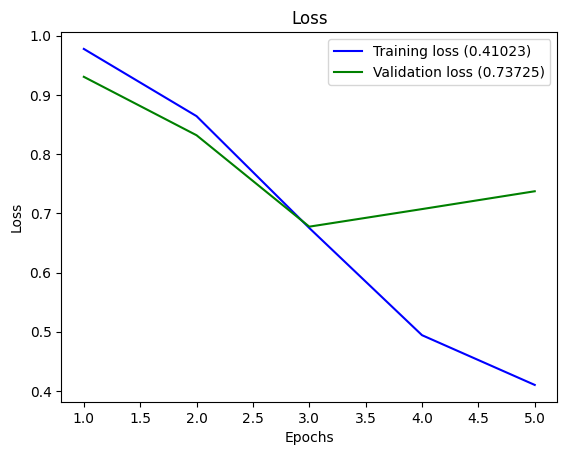

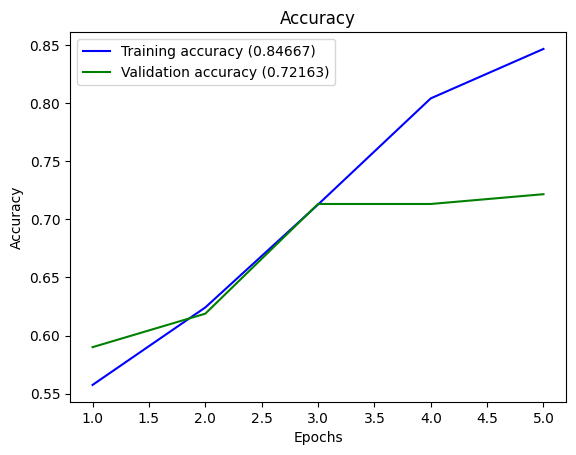

36/36 [==============================] - 1s 3ms/step
Accuracy : 0.7216312056737588

Classification Report
              precision    recall  f1-score   support

           0     0.7434    0.8202    0.7799      1268
           1     0.7517    0.6173    0.6779       358
           2     0.6519    0.5825    0.6153       630

    accuracy                         0.7216      2256
   macro avg     0.7157    0.6733    0.6910      2256
weighted avg     0.7191    0.7216    0.7177      2256

[[1040   57  171]
 [ 112  221   25]
 [ 247   16  367]]


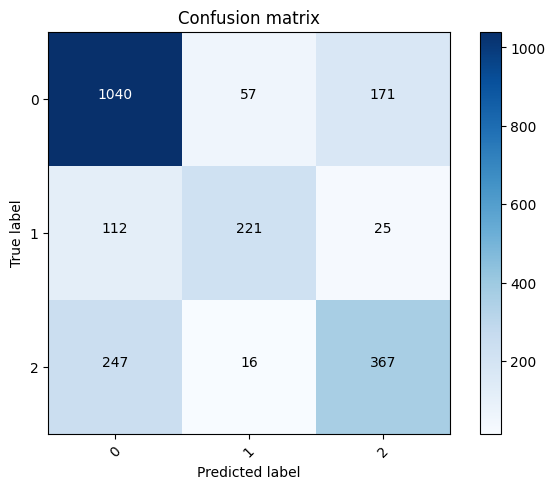

In [ ]:
#Evaluate model and print results
#==============================================================================

CNN_History=model.fit(x_train, y_train, epochs = 5, batch_size = 256,verbose=1, validation_data=(x_val,y_val), shuffle=True)

plot_history(CNN_History)

full_multiclass_report(model, x_val, y_val, encoder.inverse_transform(np.arange(3)))